In [106]:
import numpy as np
import requests
import pandas as pd
from sklearn.linear_model import LinearRegression
import json
import matplotlib.pyplot as plt
from sklearn import metrics

In [11]:
#the api key for eia site
# the api key for eia site
api_key = 'Cd5c0j9SeyjybORQEx4mjiEAAuuHlHT1vUhtOYSJ'
api_key_join_statement = '&' + 'api_key=' + api_key

# the request for get each city individual energy consumption
cities_individual_consumption = 'https://api.eia.gov/v2/seds/data/?frequency=annual&data[0]=value&facets[seriesId][' \
                                ']=TETXB&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000'

# the request for get each city individual energy consumption
cities_population = 'https://api.eia.gov/v2/seds/data/?frequency=annual&data[0]=value&facets[seriesId][]=TPOPP&sort[' \
                    '0][column]=period&sort[0][direction]=desc&offset=0&length=5000'

# the request for real gdp of each state
cities_gdp = 'https://api.eia.gov/v2/seds/data/?frequency=annual&data[0]=value&facets[seriesId][]=GDPRX&sort[0][' \
             'column]=period&sort[0][direction]=desc&offset=0&length=5000'


In [12]:
def get_cities_individual_information(query,year=2021):
    res = requests.get(query + api_key_join_statement)
    data = res.json()
    data_list = data["response"]["data"]
    data_list = [item for item in data_list if item['period'] == year]
    df = pd.DataFrame(data_list)
    return df[["seriesId", "stateDescription", "value"]]

In [17]:
cities_individual_consumption_df = get_cities_individual_information(cities_individual_consumption)


In [14]:
cities_population_df = get_cities_individual_information(cities_population)

In [15]:
cities_gdp_df = get_cities_individual_information(cities_gdp)

In [28]:
cities_number_of_vehicles_df = pd.read_excel('cars.xlsx')
cities_average_temperature_df = pd.read_excel('temprature.xlsx')

In [22]:
cities_individual_consumption_df = cities_individual_consumption_df.drop('seriesId',axis=1)
cities_individual_consumption_df = cities_individual_consumption_df.rename(columns={'value' : 'consumption'})

cities_population_df = cities_population_df.drop('seriesId',axis=1)
cities_population_df = cities_population_df.rename(columns={'value' : 'population'})

cities_gdp_df = cities_gdp_df.drop('seriesId',axis=1)
cities_gdp_df = cities_gdp_df.rename(columns={'value' : 'gdp'})

In [40]:
df = pd.merge(cities_number_of_vehicles_df,cities_population_df,on='stateDescription')
df = pd.merge(df,cities_gdp_df,on='stateDescription')
df = pd.merge(df,cities_average_temperature_df,on='stateDescription')
df = pd.merge(df,cities_individual_consumption_df,on='stateDescription')


In [60]:
final_data = df.to_excel('final_data.xlsx',index=False)
df

,stateDescription,number_of_vehicles,population,gdp,Avg °C,consumption
0,Alabama,5288209,5050,209979,17.1,1965972
1,Alaska,795274,734,50869,-3.0,684339
2,Arizona,5982559,7265,347656,15.7,1564628
3,Arkansas,2902111,3028,123347,15.8,1079619
4,California,31247270,39143,2874731,15.2,7359398
5,Colorado,5412403,5811,373763,7.3,1510409
6,Connecticut,2878547,3623,246556,9.4,704640
7,Delaware,1016927,1005,64405,12.9,295583
8,Delaware,1016927,1005,64405,12.9,295583
9,Florida,17833719,21828,1029576,21.5,4316865


In [61]:
features = df[['number_of_vehicles','population','gdp','Avg °C']]
target = df[['consumption']]

In [64]:
model = LinearRegression()
model.fit(features,target)

LinearRegression()

In [75]:
with open('cities_individual_consumption.json','r') as file:
    cities_individual_consumption_json = json.load(file)
with open('cities_population.json','r') as file:
    cities_population_json = json.load(file)
with open('cities_gdp.json','r') as file:
    cities_gdp_json = json.load(file)



In [79]:
def get_cities_individual_information_from_json_file(json_file,year=2021):
    data_list = json_file["response"]["data"]
    data_list = [item for item in data_list if item['period'] == year]
    df_tmp = pd.DataFrame(data_list)
    return df_tmp[["stateDescription", "value"]]

In [84]:
cities_population_df_2020 = get_cities_individual_information_from_json_file(cities_population_json,2020)
cities_individual_consumption_df_2020 = get_cities_individual_information_from_json_file(cities_individual_consumption_json,2020)
cities_gdp_df_2020 = get_cities_individual_information_from_json_file(cities_gdp_json,2020)
cities_cars_2020 = pd.read_excel('cars_2020.xlsx')


In [85]:
cities_individual_consumption_df_2020 = cities_individual_consumption_df_2020.rename(columns={'value' : 'consumption'})

cities_population_df_2020 = cities_population_df_2020.rename(columns={'value' : 'population'})

cities_gdp_df_2020 = cities_gdp_df_2020.rename(columns={'value' : 'gdp'})



In [86]:
df_2020 = pd.merge(cities_cars_2020,cities_population_df_2020,on='stateDescription')
df_2020 = pd.merge(df_2020,cities_gdp_df_2020,on='stateDescription')
df_2020 = pd.merge(df_2020,cities_average_temperature_df,on='stateDescription')
df_2020 = pd.merge(df_2020,cities_individual_consumption_df_2020,on='stateDescription')

In [87]:
features_test = df_2020[['number_of_vehicles','population','gdp','Avg °C']]
target_test = df_2020['consumption']

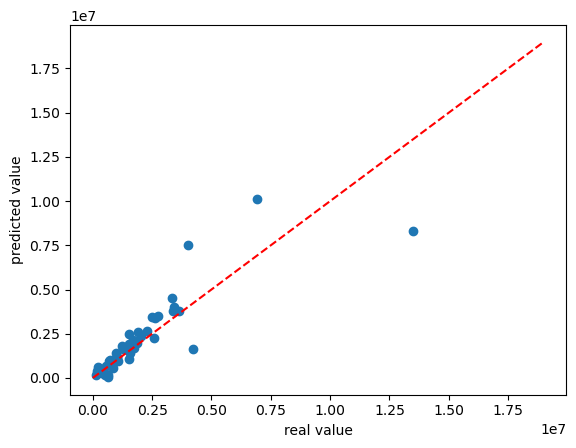

In [105]:
x = range(19*1000000)
plt.plot(x,x,color='red',linestyle = '--')

predictions = model.predict(features_test)
plt.scatter(target_test,predictions)


plt.xlabel('real value')
plt.ylabel('predicted value')

plt.show()

In [96]:
predictions


array([[ 1961751.77764102],
       [   50867.89201964],
       [ 2484620.42425247],
       [ 1190648.7239243 ],
       [10111152.21600401],
       [ 1641976.18691584],
       [  955723.16807624],
       [  338900.52377866],
       [ 7498104.35946792],
       [ 3511067.44171183],
       [  630492.21562212],
       [  651187.64350985],
       [ 3767008.49056912],
       [ 2266433.11719145],
       [ 1057753.30264597],
       [  953611.31120561],
       [ 1664486.61206309],
       [ 1658081.95692804],
       [  414589.58985376],
       [ 1793742.82315061],
       [ 1659597.35813266],
       [ 3370087.27753404],
       [ 1690537.57347671],
       [ 1183008.99309748],
       [ 2122242.78990318],
       [  410987.29816562],
       [  585712.76451508],
       [ 1034606.43489764],
       [  403600.45383405],
       [ 2617714.3988623 ],
       [  761242.15950081],
       [ 4540238.30858392],
       [ 3457720.01282191],
       [  165990.7521977 ],
       [ 3812106.26555926],
       [ 1394436.751

In [107]:
MSE = metrics.mean_squared_error(target_test,predictions)
MSE

1286478478029.1096